# Medical Information Dataset Project

### About Dataset
MID: Medicines Information Dataset
#### Description

Numerous studies on medicines are conducted day by day. To address shortcomings of medicines information generation, prediction, and classification models, the authors introduce a large medicines information dataset of textual data. For this motivation, the authors named our dataset ‘MID’.

• Value of the data
- MID is the largest, to our knowledge, available and representative Medicines Information Dataset (MID) for a wide variety of drugs. It includes the names of over 192k medicines, making it a comprehensive collection of pharmaceutical products.
- MID is the largest, making it robust for generating information about drugs such as indications or interactions.
- MID offers over 192k rows distributed in 44 variety therapeutic classes, making it robust for drug classification to therapeutic label.
- MID provides accurate, authoritative, and trustworthy information on medicines for enhancing predictions and efficiencies in clinical trial management.
- MID includes details such as drug names, information URL, salt composition, drug introduction, therapeutic uses, side effects, drug benefits, how to use of drug, how to use of drug, how drug works, quick tips of drug, safety advice of drug, chemical class of drug, habit forming of drug, therapeutic class of drug, and action class of drug. This dataset aims to provide a useful resource for medical researchers, healthcare professionals, drug manufacturers, data scientists, and enthusiasts interested in exploring the world of medicines and healthcare products.
- In contrast with the few small available datasets, MID's size makes it a suitable corpus for implementing both classical as well as deep learning models.

• MID.xlsx provides the raw data, including medicine information. The data collected to ensure an acceleration and save experimental efforts for medicines through help in predicting or generating or classifying of medicine information preclinically.

• Therapeutic_class_counts.xlsx is summarize distribution of medicines per therapeutic class.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#NLP visualization
from wordcloud import WordCloud 

import nltk
from nltk.corpus import stopwords

In [2]:
#load the MID dataset
mid_df = pd.read_excel("MID.xlsx")
mid_df.head()

,Name,Link,Contains,ProductIntroduction,ProductUses,ProductBenefits,SideEffect,HowToUse,HowWorks,QuickTips,SafetyAdvice,Chemical_Class,Habit_Forming,Therapeutic_Class,Action_Class
0,Andol 0.5mg Tablet,https://www.1mg.com/drugs/andol-0.5mg-tablet-6...,Haloperidol (0.5mg),Andol 0.5mg Tablet can also be used for treati...,"\n \n \nul \""\""\n\n \n 0\n\n \n Schiz...",\n \n Schizophrenia \n \n Schizophrenia is ...,Most side effects do not require any medical a...,Take this medicine in the dose and duration as...,Andol 0.5mg Tablet is a typical antipsychotic....,\n \n Andol 0.5mg Tablet helps treat schizop...,"\nAlcohol\n,\nAndol 0.5mg Tablet may cause exc...",Butyrophenone Derivative,No,NEURO CNS,Typical Antipsychotic
1,Avastin 100mg Injection,https://www.1mg.com/drugs/avastin-100mg-inject...,Bevacizumab (100mg),"\np dir=\""ltr\"" style=\""line-height: 1.38; mar...","\n \n \nul \""\""\n\n \n 0\n\n \n Cance...",\n \n Cancer of colon and rectum \n \n Canc...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Avastin 100mg Injection is a anti-angiogenic m...,\n \n Avastin 100mg Injection is an effectiv...,"\nAlcohol\n,\nIt is not known whether it is sa...",Monoclonal antibody (mAb),No,ANTI NEOPLASTICS,Vascular endothelial growth factor (VEGF) in...
2,Actorise 40 Injection,https://www.1mg.com/drugs/actorise-40-injectio...,Darbepoetin alfa (40mcg),Actorise 40 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 40 Injection is an erythropoiesis-sti...,\n \n Actorise 40 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA
3,Actorise 25 Injection,https://www.1mg.com/drugs/actorise-25-injectio...,Darbepoetin alfa (25mcg),Actorise 25 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 25 Injection is an erythropoiesis-sti...,\n \n Actorise 25 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA
4,Actorise 60 Injection,https://www.1mg.com/drugs/actorise-60-injectio...,Darbepoetin alfa (60mcg),Actorise 60 Injection is a medicine that needs...,"\n \n \nul \""\""\n\n \n 0\n\n \n Treat...",\n \n Treatment of Anemia due to chronic kid...,Most side effects do not require any medical a...,Your doctor or nurse will give you this medici...,Actorise 60 Injection is an erythropoiesis-sti...,\n \n Actorise 60 Injection helps in the tre...,"\nAlcohol\n,\nIt is not known whether it is sa...","Amino Acids, Peptides Analogues",No,BLOOD RELATED,Erythropoiesis-stimulating agent (ESA


In [3]:
#load the therapeutic class counts dataset
therapeutic_counts_df = pd.read_excel('Therapeutic_class_counts-fXyUUS.xlsx')
therapeutic_counts_df.head()

,Therapeutic_class,Size,Ratio,Unnamed: 3,Unnamed: 4
0,ANTI INFECTIVES,20291,0.105240,NaN,192807.0
1,PAIN ANALGESIC,18861,0.097823,NaN,NaN
2,RESPIRATOR,16392,0.085018,NaN,NaN
3,GASTRO INTESTINA,15716,0.081512,NaN,NaN
4,ANTI INFECTIVE,13333,0.069152,NaN,NaN


In [4]:
#display basic info about the MID dataset
mid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192807 entries, 0 to 192806
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Name                 192807 non-null  object
 1   Link                 192807 non-null  object
 2   Contains             192807 non-null  object
 3   ProductIntroduction  180821 non-null  object
 4   ProductUses          192807 non-null  object
 5   ProductBenefits      192807 non-null  object
 6   SideEffect           192807 non-null  object
 7   HowToUse             192712 non-null  object
 8   HowWorks             192571 non-null  object
 9   QuickTips            192807 non-null  object
 10  SafetyAdvice         192807 non-null  object
 11  Chemical_Class       101473 non-null  object
 12  Habit_Forming        192807 non-null  object
 13  Therapeutic_Class    192807 non-null  object
 14  Action_Class         85690 non-null   object
dtypes: object(15)
memory usage: 22.1+ 

In [5]:
#display basic info about the therapeutic class counts dataset
therapeutic_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Therapeutic_class  44 non-null     object 
 1   Size               44 non-null     int64  
 2   Ratio              44 non-null     float64
 3   Unnamed: 3         0 non-null      float64
 4   Unnamed: 4         1 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.8+ KB


In [6]:
#checks for missing values
print("Missing values in MID dataset:")
print(mid_df.isnull().sum())

print("\nMissing values in therapeutic class counts dataset:")
print(therapeutic_counts_df.isnull().sum())

Missing values in MID dataset:
Name                        0
Link                        0
Contains                    0
ProductIntroduction     11986
ProductUses                 0
ProductBenefits             0
SideEffect                  0
HowToUse                   95
HowWorks                  236
QuickTips                   0
SafetyAdvice                0
Chemical_Class          91334
Habit_Forming               0
Therapeutic_Class           0
Action_Class           107117
dtype: int64

Missing values in therapeutic class counts dataset:
Therapeutic_class     0
Size                  0
Ratio                 0
Unnamed: 3           44
Unnamed: 4           43
dtype: int64


### Clean the Therapeutic Class Counts Dataset

In [7]:
#drop unnecessary coluns with mostly missing  values
therapeutic_counts_df = therapeutic_counts_df.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

#verify cleaning
print("Cleaned Therapeutic Class Counts Dataset: ")
print(therapeutic_counts_df.head())
print("\nMissing values in Therapeutic Class Counts Dataset: ")
print(therapeutic_counts_df.isnull().sum())

Cleaned Therapeutic Class Counts Dataset: 
  Therapeutic_class   Size     Ratio
0   ANTI INFECTIVES  20291  0.105240
1    PAIN ANALGESIC  18861  0.097823
2        RESPIRATOR  16392  0.085018
3  GASTRO INTESTINA  15716  0.081512
4    ANTI INFECTIVE  13333  0.069152

Missing values in Therapeutic Class Counts Dataset: 
Therapeutic_class    0
Size                 0
Ratio                0
dtype: int64


* The Unnamed: 3 (44 missing) and Unnamed: 4 (43 missing) columns are mostly empty and likely irrelevant, so we drop them to simplify the dataset.

### Clean the MID Dataset

In [8]:
#fill missing text fields with "Not Specified"
mid_df['ProductIntroduction'] = mid_df['ProductIntroduction'].fillna('Not Specified')
mid_df['HowToUse'] = mid_df['HowToUse'].fillna('Not Specified')
mid_df['HowWorks'] = mid_df['HowWorks'].fillna('Not Specified')
mid_df['Chemical_Class'] = mid_df['Chemical_Class'].fillna('Not Specified')
mid_df['Action_Class'] = mid_df['Action_Class'].fillna('Not Specified')

In [9]:
mid_df.isnull().sum()

Name                   0
Link                   0
Contains               0
ProductIntroduction    0
ProductUses            0
ProductBenefits        0
SideEffect             0
HowToUse               0
HowWorks               0
QuickTips              0
SafetyAdvice           0
Chemical_Class         0
Habit_Forming          0
Therapeutic_Class      0
Action_Class           0
dtype: int64

* Summary of categorical columns


In [10]:
print("Unique values in Therapeutic_Class column:")
print('Therapeutic_Class: ', mid_df['Therapeutic_Class'].nunique())

print("\nUnique values in Chemical_Class column:")
print('Chemical_Class: ', mid_df['Chemical_Class'].nunique())

print("\nUnique values in Habit_Forming column:")
print('Habit_Forming: ', mid_df['Habit_Forming'].nunique())

print("\nUnique values in Action_Class column:")
print('Action_Class: ', mid_df['Action_Class'].nunique())

Unique values in Therapeutic_Class column:
Therapeutic_Class:  44

Unique values in Chemical_Class column:
Chemical_Class:  870

Unique values in Habit_Forming column:
Habit_Forming:  4

Unique values in Action_Class column:
Action_Class:  406


* Therapeutic_Class:  44 matches the counts dataset

<AxesSubplot:>

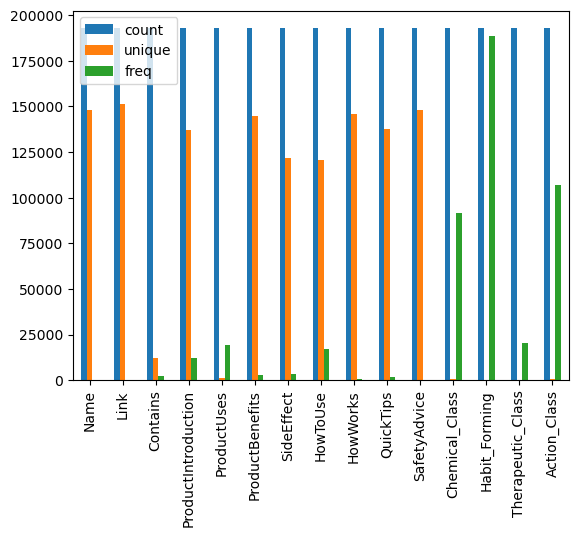

In [11]:
mid_df.describe().T.plot(kind='bar')

* To see which therapeutic classes are the most popular and which are not

In [12]:
mid_df['Therapeutic_Class'].value_counts()

  ANTI INFECTIVES                 20291
  PAIN ANALGESIC                  18861
  RESPIRATOR                      16392
  GASTRO INTESTINA                15716
  ANTI INFECTIVE                  13333
  NEURO CNS                       11995
  GASTRO INTESTINAL               11743
  CARDIA                           8486
  ANTI DIABETI                     8466
  NEURO CN                         8125
  CARDIAC                          7190
  PAIN ANALGESICS                  5891
  DERM                             5823
  ANTI DIABETIC                    4051
  DERMA                            3868
  RESPIRATORY                      3724
  GYNAECOLOGICAL                   3526
  OPHTHAL                          3181
  VITAMINS MINERALS NUTRIENT       2899
  ANTI NEOPLASTICS                 2537
  HORMONE                          2221
  BLOOD RELATED                    1744
  OPHTHA                           1728
  HORMONES                         1620
  UROLOGY                          1253


#### To gather all the "How to Use" instructions into one big informative blob


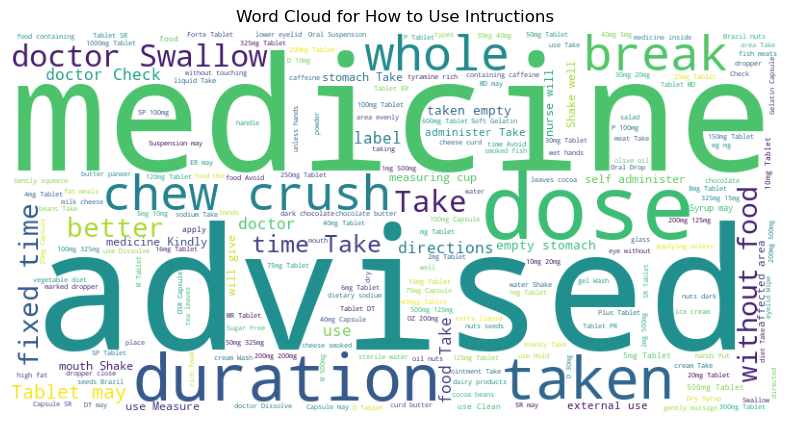

In [13]:
#combining all HowToUse text into one string
text = " ".join(mid_df['HowToUse'].tolist())

#create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#show the wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for How to Use Intructions')
plt.show()

#### Let's measure how long each "How to Use" instruction is 

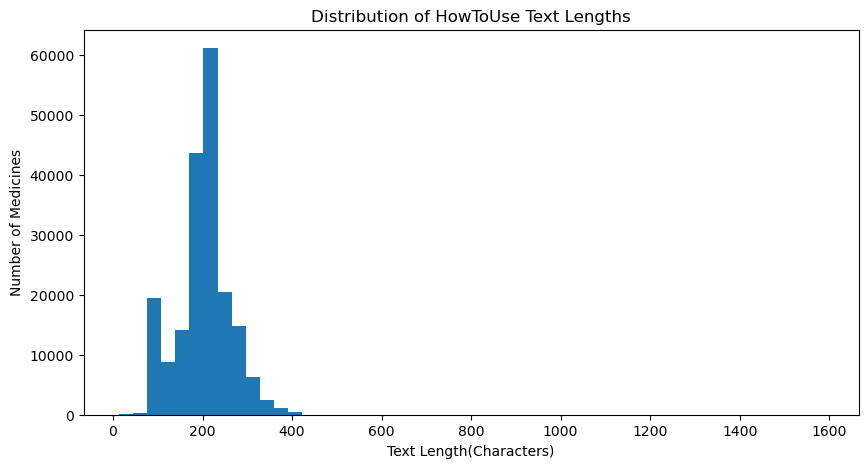

In [14]:
#calculate the length of each HowToUse text
text_lengths = mid_df['HowToUse'].str.len()

#create a histogram of text lengths
plt.figure(figsize=(10,5))
plt.hist(text_lengths, bins=50)
plt.title("Distribution of HowToUse Text Lengths")
plt.xlabel("Text Length(Characters)")
plt.ylabel("Number of Medicines")
plt.show()

#### Bar Plot for Therapeutic Class Distribution

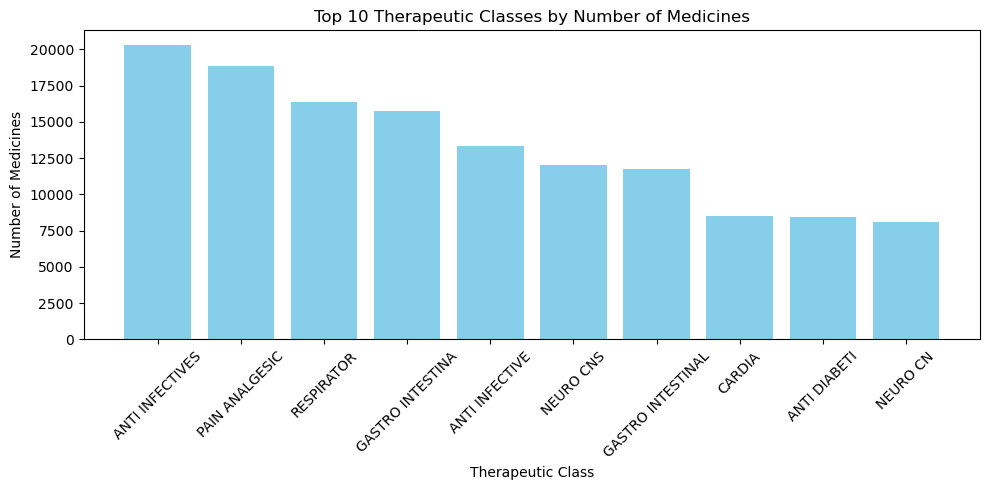

In [15]:
#sort by size and select top 10
top_10_classes = therapeutic_counts_df.sort_values(by='Size', ascending=False).head(10)

# Create a bar plot for top 10 therapeutic classes by Size
plt.figure(figsize=(10, 5))
plt.bar(top_10_classes['Therapeutic_class'], top_10_classes['Size'], color='skyblue')
plt.title('Top 10 Therapeutic Classes by Number of Medicines')
plt.xlabel('Therapeutic Class')
plt.ylabel('Number of Medicines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# WordCloud for Side-Effect

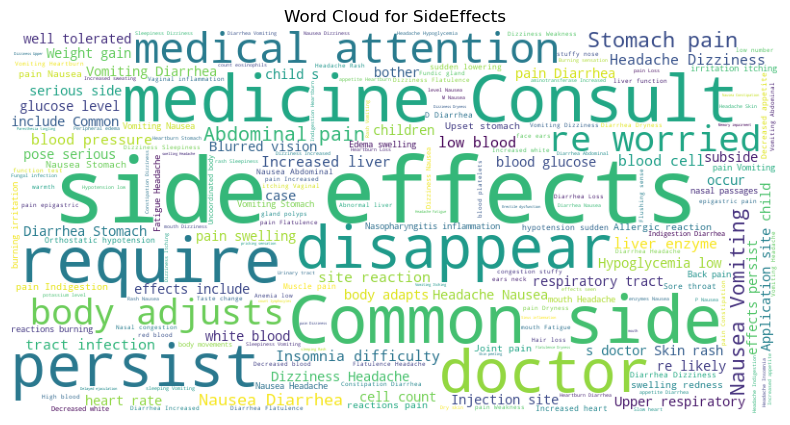

In [16]:
#combining all SideEffects text into one string
text = " ".join(mid_df['SideEffect'].tolist())

#create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#show the wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for SideEffects')
plt.show()

# Histogram for SideEffect Text Lengths

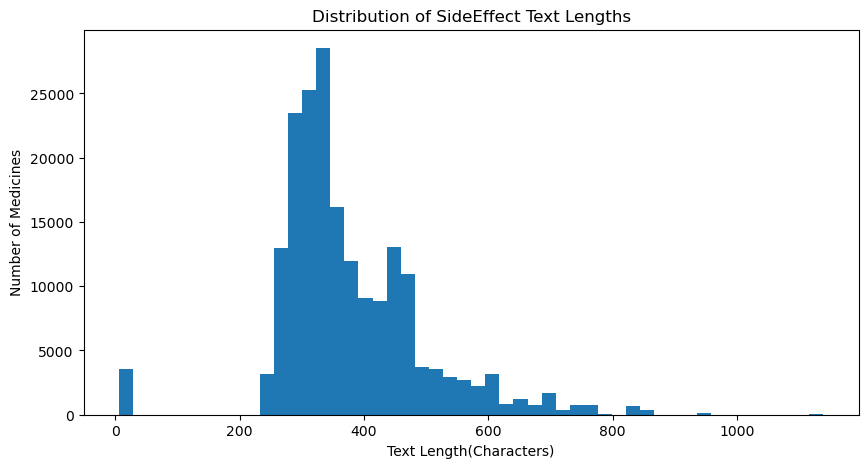

In [17]:
#calculate the length of each SideEffect text
text_lengths = mid_df['SideEffect'].str.len()

#create a histogram of text lengths
plt.figure(figsize=(10,5))
plt.hist(text_lengths, bins=50)
plt.title("Distribution of SideEffect Text Lengths")
plt.xlabel("Text Length(Characters)")
plt.ylabel("Number of Medicines")
plt.show()

# Bar Plot for Top 10 Chemical Classes

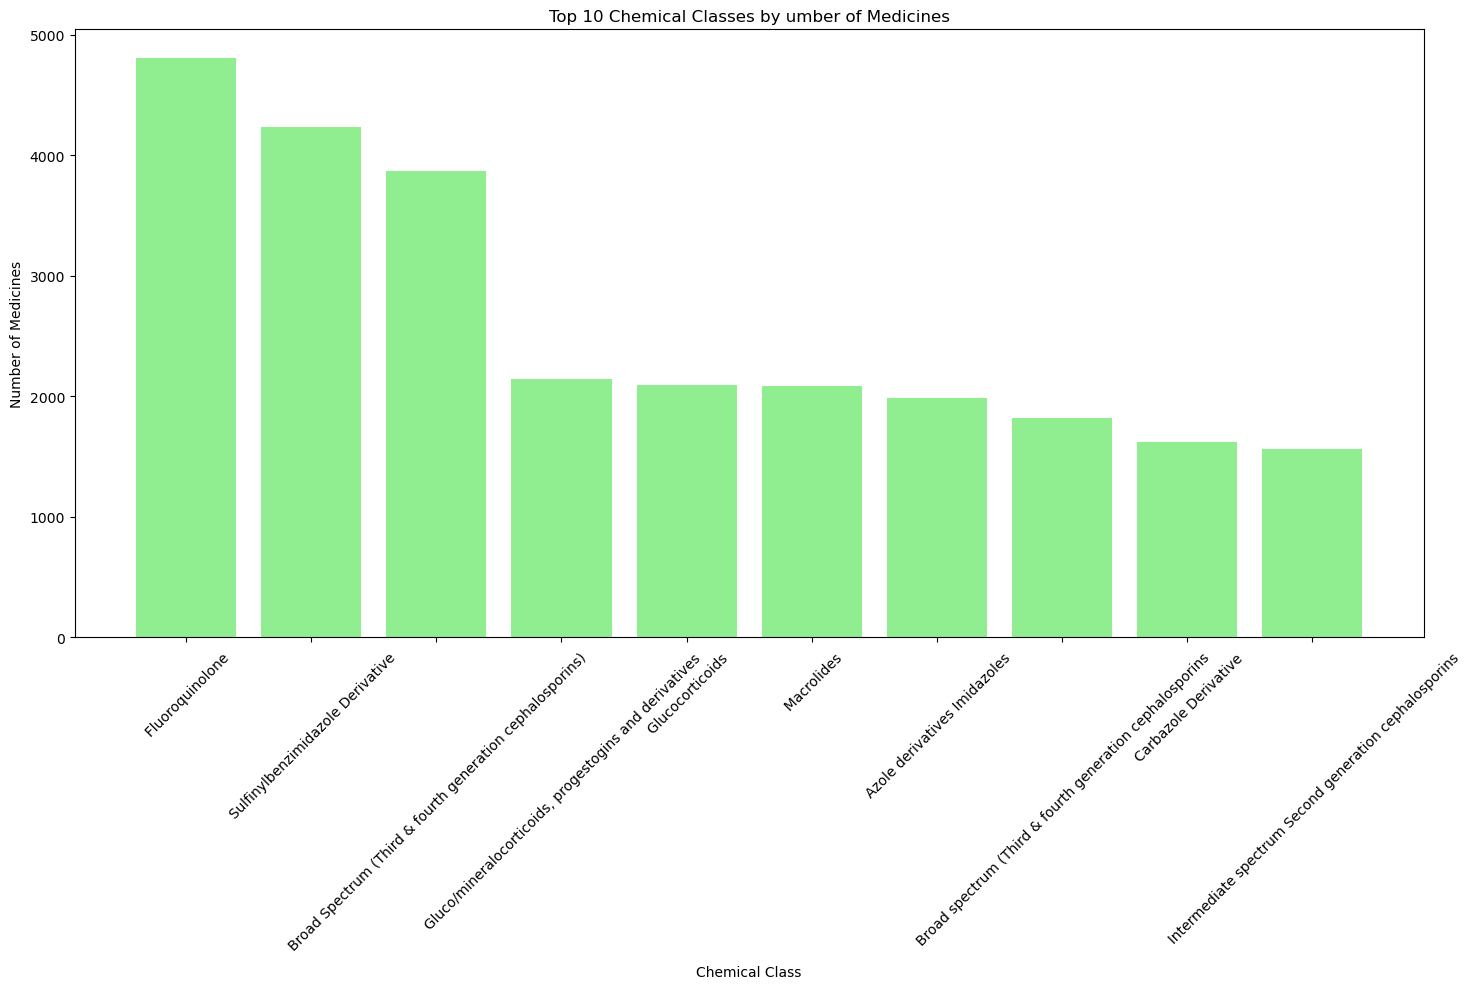

In [18]:
top_10_chemicals = mid_df['Chemical_Class'].value_counts().head(10)

# Get the top 10 Chemical_Class values, excluding 'Not Specified'
top_10_chemicals = mid_df['Chemical_Class'][mid_df['Chemical_Class'] != 'Not Specified'].value_counts().head(10)

#create a bar plot
plt.figure(figsize=(15,10))
plt.bar(top_10_chemicals.index, top_10_chemicals.values, color='lightgreen')
plt.title('Top 10 Chemical Classes by umber of Medicines')
plt.xlabel('Chemical Class')
plt.ylabel('Number of Medicines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The bar plot for the top 10 Chemical_Class values (excluding "Not Specified") in the MID dataset highlights the most prevalent chemical compositions among the 192,807 medicines, with classes like "Fluoroquinolone", "Sulfinylbenzimidazole Derivative", "Broad Spectrum (Third & Fourth Generation cephalosporins)" ranking the top 3.

## Bar Plot for Top 10 Action Classes 

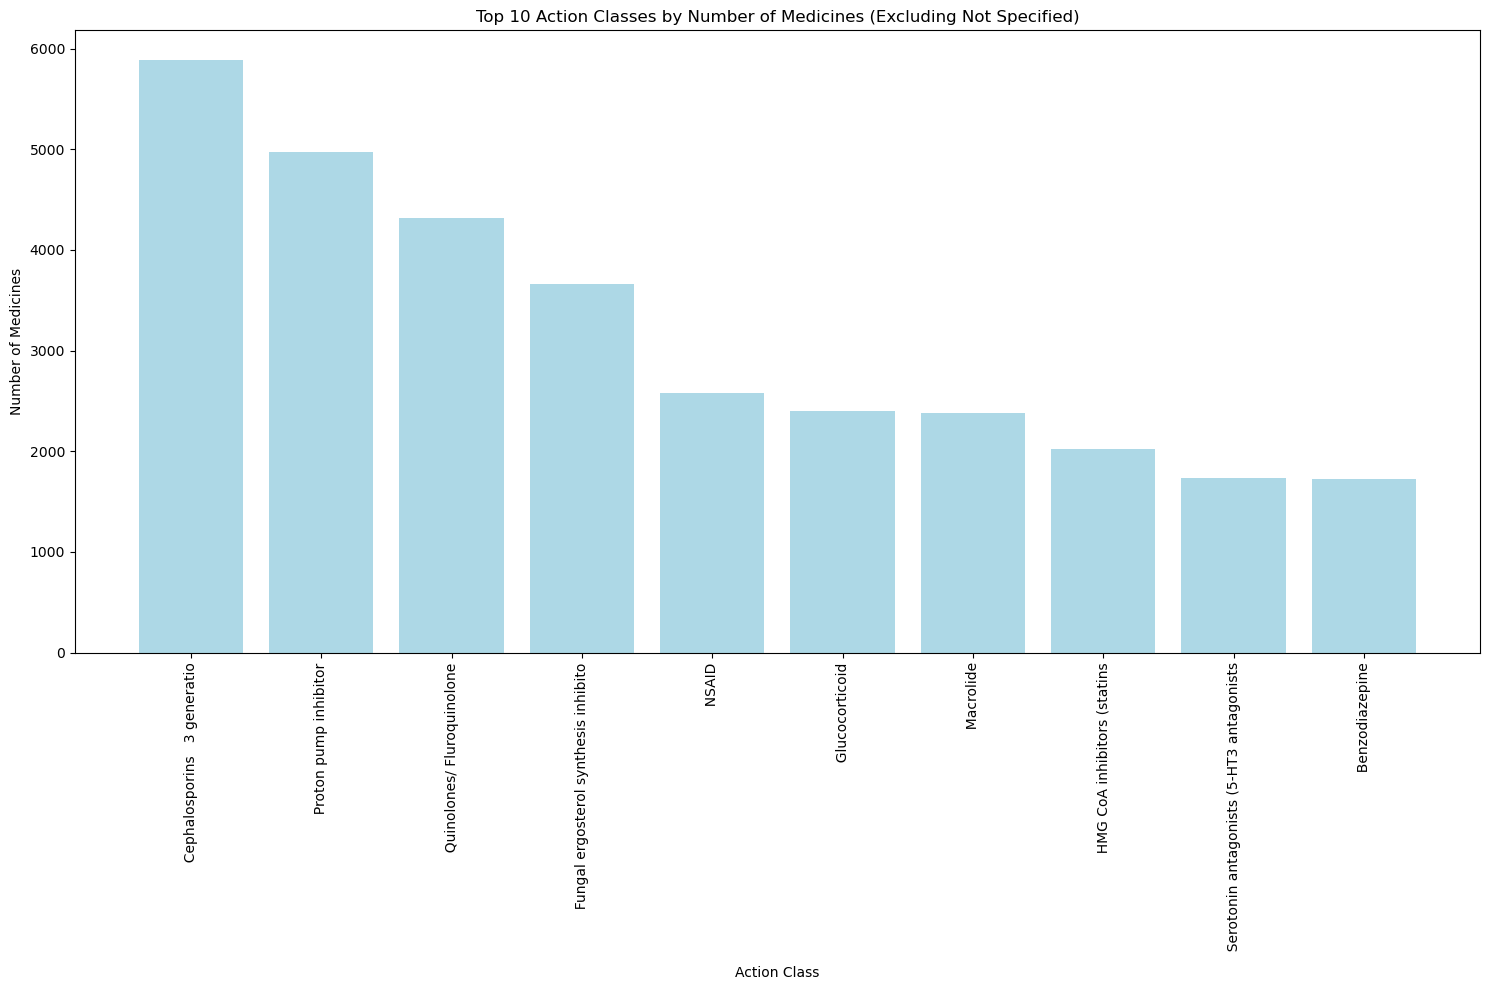

In [19]:
# Get the top 10 Action_Class values, excluding 'Not Specified'
top_10_actions = mid_df['Action_Class'][mid_df['Action_Class'] != 'Not Specified'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(15, 10))
plt.bar(top_10_actions.index, top_10_actions.values, color='lightblue')
plt.title('Top 10 Action Classes by Number of Medicines (Excluding Not Specified)')
plt.xlabel('Action Class')
plt.ylabel('Number of Medicines')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Cephalosporins 3 generation, Proton pump inhibitor, Quinolones / Fluroquinolone, Fungal ergosterol synthesis inhibitoare the top 4 when it comes to action classes

## Scatter Plot for Size vs. Ratio 

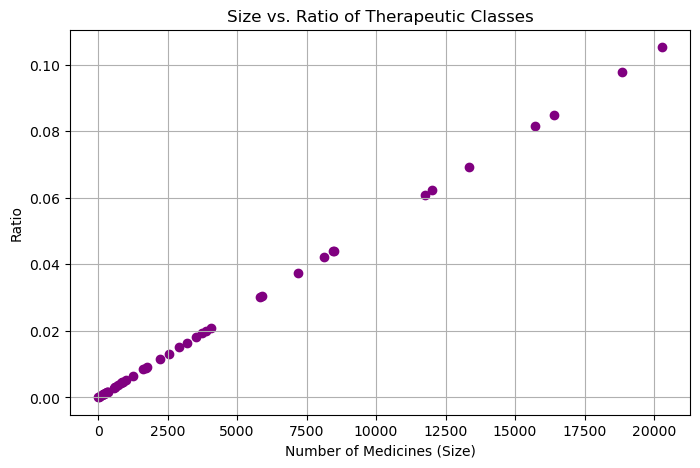

In [20]:
# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(therapeutic_counts_df['Size'], therapeutic_counts_df['Ratio'], color='purple')
plt.title('Size vs. Ratio of Therapeutic Classes')
plt.xlabel('Number of Medicines (Size)')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()

- The scatter plot comparing Size and Ratio from the therapeutic class counts dataset shows a general trend where larger therapeutic classes tend to have higher ratios, indicating a positive relationship between the number of medicines and their proportional representation. Some outliers suggest that certain classes have unexpected ratios relative to their size, possibly due to data distribution variations. This highlights that while size often influences ratio, other factors may also play a role, warranting further investigation.

# Violin Plot for SideEffect Text Lengths

* shows detailed view of text length distribution, complementing the histogram by showing density peaks and outliers.

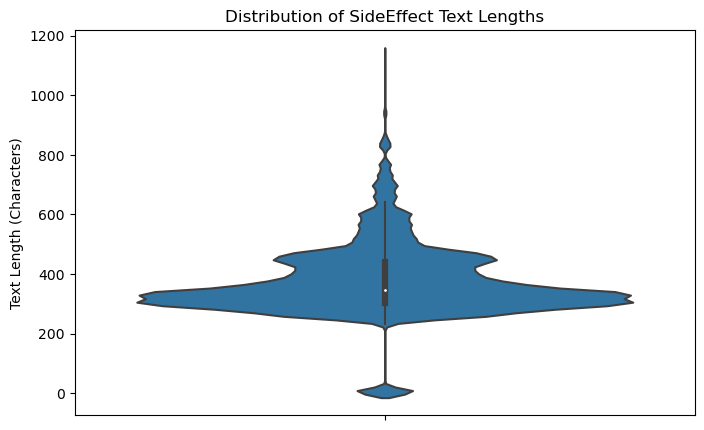

In [21]:
# Clean the SideEffect column
mid_df['SideEffect'] = mid_df['SideEffect'].fillna('Not Specified')

# Calculate text lengths
text_lengths = mid_df['SideEffect'].str.len()

# Create a violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(y=text_lengths)
plt.title('Distribution of SideEffect Text Lengths')
plt.ylabel('Text Length (Characters)')
plt.show()

* The violin plot indicates that most side effect texts cluster around 300-400 characters, with some outliers reaching over 1000 characters, suggesting a long-tailed distribution.

## Line Plot of Cumulative Therapeutic Class Sizes

* Creates a line plot showing the cumulative total of medicines as we move through therapeutic classes, sorted by size.

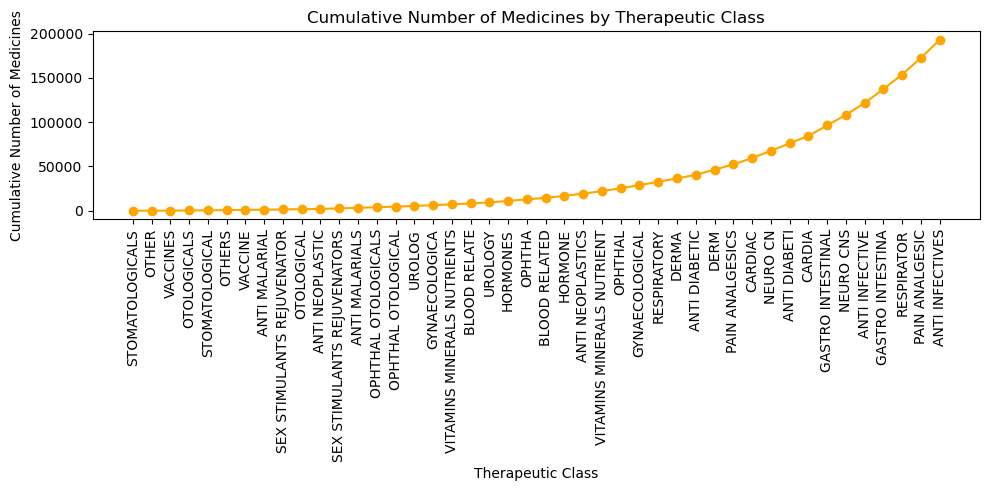

In [22]:
# Sort by Size and calculate cumulative sum
therapeutic_counts_df = therapeutic_counts_df.sort_values(by='Size', ascending=True)
therapeutic_counts_df['Cumulative_Size'] = therapeutic_counts_df['Size'].cumsum()

# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(therapeutic_counts_df['Therapeutic_class'], therapeutic_counts_df['Cumulative_Size'], marker='o', color='orange')
plt.title('Cumulative Number of Medicines by Therapeutic Class')
plt.xlabel('Therapeutic Class')
plt.ylabel('Cumulative Number of Medicines')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* The plot shows an exponential-like increase in cumulative medicines across therapeutic classes, with anti-infectives, analgesics, and respiratory medicines contributing the highest counts. 

## Boxen Plot for HowToUse Text Lengths 
* Creates a boxen plot showing the distribution of HowToUse text lengths, with detailed boxes to highlight multiple summary statistics and outliers, offering a richer view than a standard box plot.

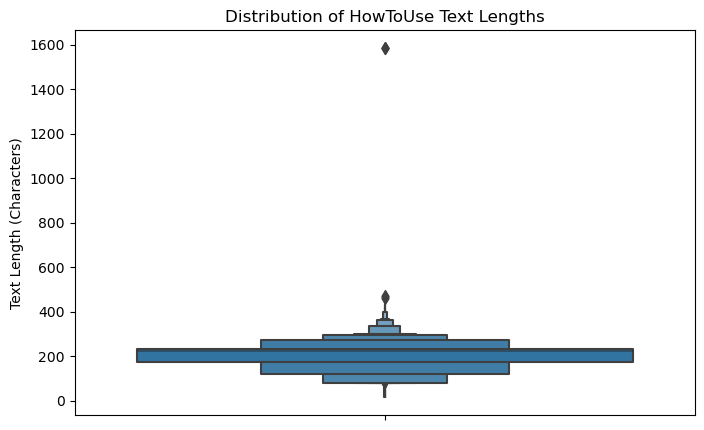

In [23]:
# Clean the HowToUse column
mid_df['HowToUse'] = mid_df['HowToUse'].fillna('Not Specified')

# Calculate text lengths
text_lengths = mid_df['HowToUse'].str.len()

# Create a boxen plot
plt.figure(figsize=(8, 5))
sns.boxenplot(y=text_lengths)
plt.title('Distribution of HowToUse Text Lengths')
plt.ylabel('Text Length (Characters)')
plt.show()

* The box plot shows that most HowToUse texts are between ~100 and 300 characters, with a median around 200 characters. There are a few significant outliers, including an extreme outlier above 1500 characters, indicating occasional very detailed instructions. 

## Multi-Class Text Classification Results: Logistic Regression Model 

In [25]:
# Import needed tools
import re
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
# Step 1: Combine text columns into one
mid_df["text"] = mid_df["HowToUse"].astype(str) + " " + mid_df["ProductBenefits"].astype(str) + " " + 
mid_df["SideEffect"].astype(str)

# Step 2: Clean the text
def clean_text(text):
    # Make all letters lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # Remove punctuation and special characters, keep only letters and numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    # Remove extra spaces and trim
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to the text column
mid_df["text"] = mid_df["text"].apply(clean_text)

In [28]:
# Step 3: Download and remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Split text into words, keep only those not in stop_words, and join back
    return " ".join(word for word in text.split() if word not in stop_words)

# Apply stopword removal
mid_df["text"] = mid_df["text"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [29]:
# Step 4: Prepare data for training
X = mid_df["text"]  # The cleaned text will help the model learn
y = mid_df["Therapeutic_Class"]  # The target we want to predict

# Turn text labels into numbers
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Convert text to numbers the model can understand
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_train_vec = tfidf.fit_transform(X_train)  # Teach and transform training data
X_test_vec = tfidf.transform(X_test)  # Transform test data with the same rules

In [31]:
# Step 6: Train the model
model = LogisticRegression(max_iter=1000)  # Set up a simple model with extra time to learn
model.fit(X_train_vec, y_train)  # Teach the model using training data

# Step 7: Make predictions and check results
y_pred = model.predict(X_test_vec)  # Model guesses on test data

# Show how accurate the model is
print("Accuracy:", accuracy_score(y_test, y_pred))

# Show detailed performance (precision, recall, etc.)
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.981717753228567
                                precision    recall  f1-score   support

                  ANTI DIABETI       1.00      0.99      1.00      1676
                ANTI DIABETIC        0.99      1.00      0.99       804
                ANTI INFECTIVE       0.99      0.98      0.98      2631
              ANTI INFECTIVES        0.99      0.99      0.99      4029
                 ANTI MALARIAL       1.00      1.00      1.00        52
               ANTI MALARIALS        1.00      1.00      1.00       129
               ANTI NEOPLASTIC       0.94      0.78      0.86        79
             ANTI NEOPLASTICS        0.97      0.97      0.97       486
                  BLOOD RELATE       0.86      0.91      0.89       223
                BLOOD RELATED        0.92      0.96      0.94       346
                        CARDIA       0.99      0.96      0.98      1644
                      CARDIAC        0.96      0.99      0.98      1464
                          DERM     

C:\Users\Priyanka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Priyanka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Priyanka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


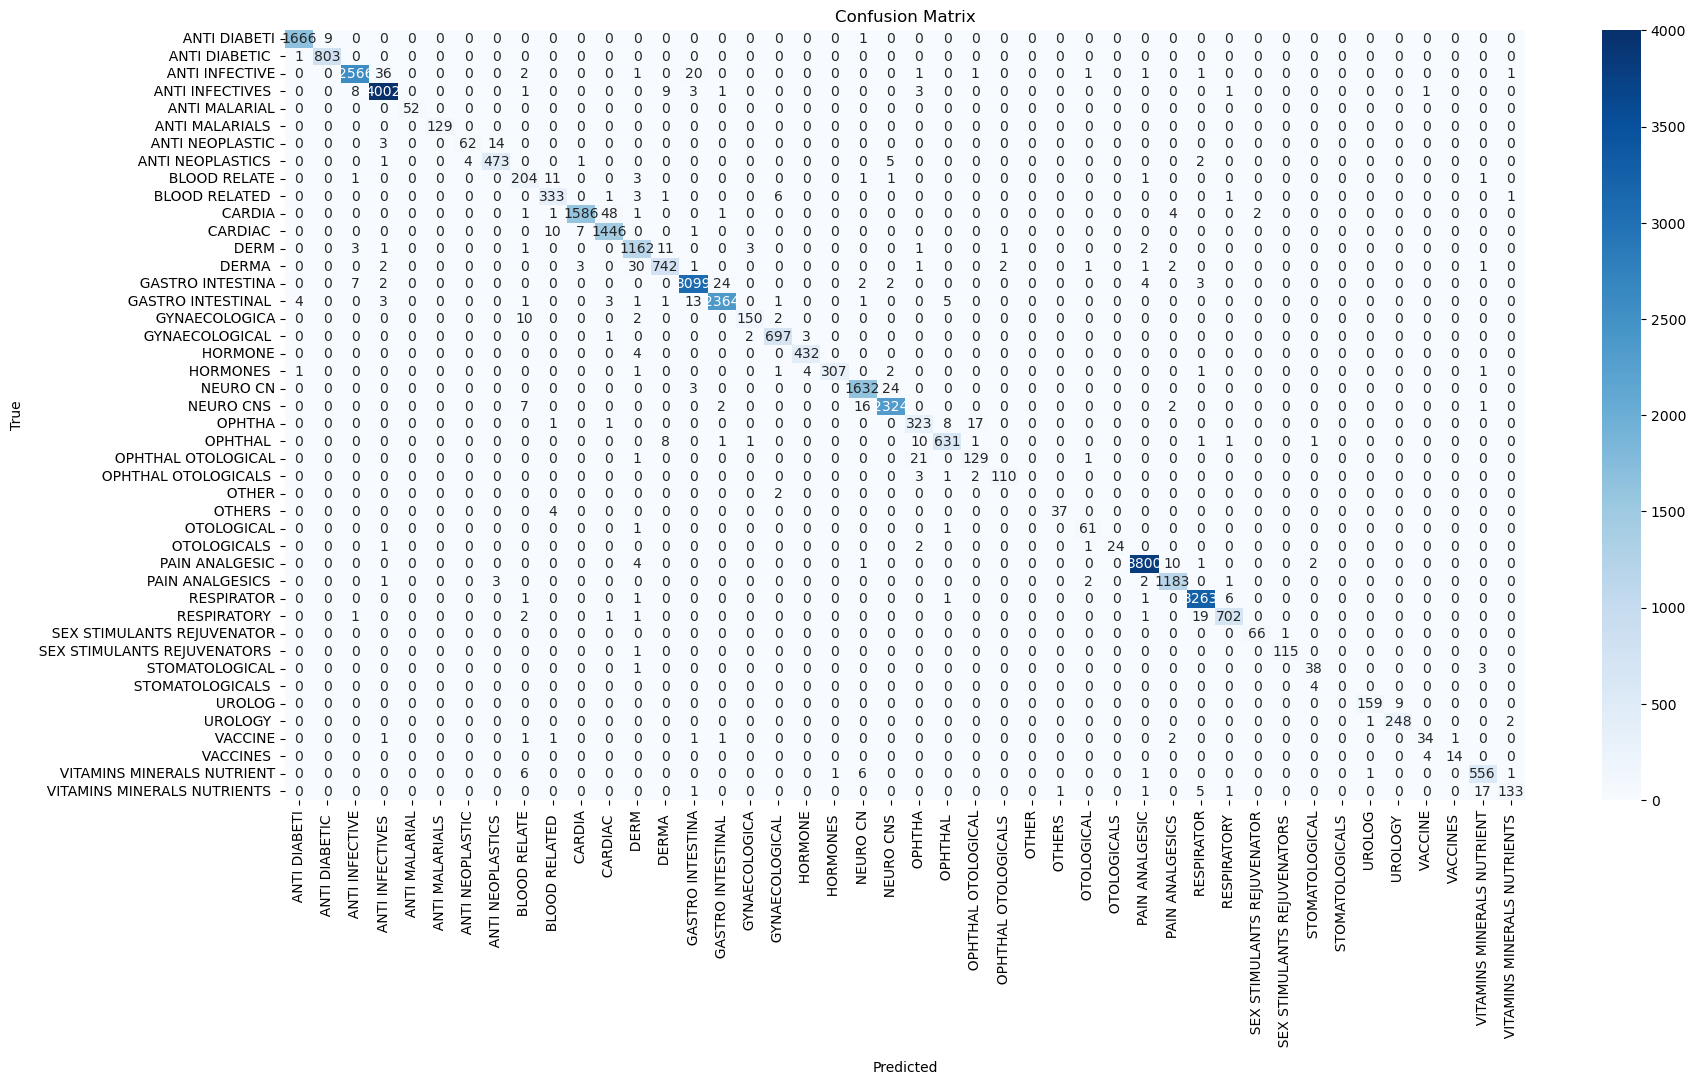

In [34]:
# Step 8: Create a confusion matrix to see where mistakes happened
plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Model Performance Analysis

The Logistic Regression model achieved a high overall accuracy of ~98.2%, indicating strong performance in classifying therapeutic classes based on combined text features (HowToUse, ProductBenefits, SideEffect).

#### Precision & Recall:

  - Most classes have precision and recall values above 0.95, showing the model is both accurate and reliable in its predictions.

#### Strongly Performing Classes:

  - Major therapeutic classes such as ANTI DIABETIC, ANTI INFECTIVES, CARDIAC, PAIN ANALGESICS, RESPIRATORY have near-perfect precision and recall, reflecting sufficient data volume and distinct text patterns.

####  Classes with Lower Performance:


  - ANTI NEOPLASTIC (precision: 0.94, recall: 0.78) and OTHERS/STOMATOLOGICALS/VACCINES showed comparatively lower scores due to fewer samples and overlapping text features.

  - Some classes (e.g. OTHERS, STOMATOLOGICALS) had an F1-score of 0, indicating no correct predictions for those categories, likely due to very low sample size.

####  Confusion Matrix Insights:
The confusion matrix reveals:


  - Predictions are highly concentrated along the diagonal, reinforcing the model’s accuracy.

  - Misclassifications mainly occur between therapeutically similar or textually overlapping classes such as GASTRO INTESTINA vs GASTRO INTESTINAL, CARDIA vs CARDIAC, and DERM vs DERMA.

####  Key Takeaways:



  - The model effectively captures class-specific text features, but minor classes with limited data need augmentation for better generalization.
